# Kogo powinniśmy zatrzymać w naszej firmie?
Poniżej znajduje się analiza danych pracowników, na której podstawie zostaną wyprowadzone wnioski o prawdopodobieństwie ich odejścia

* W pierwszej części dokumentu przyjrzymy się zawartości pliku Attrition_dataset.csv w celu zdobycia informacji o czynnikach różniących pracowników, którzy odeszli od nadal zatrudnionych


* W drugiej części przedstawimy dane dotyczące pliku Cities_map.csv i przeanalizujemy wpływ lokalizacji miejsca pracy osób zatrudnionych w firmie na ich późniejszą obecność w firmie

* W trzeciej części przedstawione są zmiany w firmie na przestrzeni czasu

In [104]:
# Import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import danych
Attrition_dataset = pd.read_csv('https://raw.githubusercontent.com/JayJaySea/Hackaton-Files/main/Attrition_dataset.csv', sep=';')
Cities_map = pd.read_csv('https://raw.githubusercontent.com/JayJaySea/Hackaton-Files/main/Cities_map.csv', sep=';')

## Analiza zawartości pliku Attrition_dataset.csv



### Przedstawienie wstępnych informacji

In [105]:
Attrition_dataset.head(10)

,Emp_ID,MMM.YY,Age,Salary,LastWorkingDate,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
0,1,01.01.2016,28,"57387,00 USD",NaN,1,2381060,2,Male,C23,MASTER,24.12.2015,1
1,1,01.02.2016,28,"57387,00 USD",NaN,1,-665480,2,Male,C23,MASTER,24.12.2015,1
2,1,01.03.2016,28,"57387,00 USD",11.03.2016,1,0,2,Male,C23,MASTER,24.12.2015,1
3,2,01.11.2017,31,"67016,00 USD",NaN,2,0,1,Male,C7,Master,06.11.2017,2
4,2,01.12.2017,31,"67016,00 USD",NaN,2,0,1,Male,C7,Master,06.11.2017,2
5,4,01.12.2016,43,"65603,00 USD",NaN,2,0,1,Male,C13,Master,07.12.2016,2
6,4,01.01.2017,43,"65603,00 USD",NaN,2,0,1,Male,C13,Master,07.12.2016,2
7,4,01.02.2017,43,"65603,00 USD",NaN,2,0,1,Male,C13,Master,07.12.2016,2
8,4,01.03.2017,43,"65603,00 USD",NaN,2,350000,1,Male,C13,Master,07.12.2016,2
9,4,01.04.2017,43,"65603,00 USD",27.04.2017,2,0,1,Male,C13,Master,07.12.2016,2


In [106]:
Attrition_dataset.describe()

,Emp_ID,Age,Designation,Total.Business.Value,Quarterly.Rating,Joining.Designation
count,19190.000000,19190.000000,19190.000000,1.919000e+04,19190.000000,19190.000000
mean,1416.239083,34.649192,2.252579,5.710257e+05,2.008963,1.690412
std,810.866259,6.264600,1.026329,1.126591e+06,1.009839,0.836580
min,1.000000,21.000000,1.000000,-6.000000e+06,1.000000,1.000000
25%,712.000000,30.000000,1.000000,0.000000e+00,1.000000,1.000000
50%,1417.500000,34.000000,2.000000,2.500000e+05,2.000000,1.000000
75%,2139.000000,39.000000,3.000000,6.995850e+05,3.000000,2.000000
max,2788.000000,58.000000,5.000000,3.374772e+07,4.000000,5.000000


In [107]:
Attrition_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19190 entries, 0 to 19189
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19190 non-null  int64 
 1   MMM.YY                19190 non-null  object
 2   Age                   19190 non-null  int64 
 3   Salary                19190 non-null  object
 4   LastWorkingDate       1628 non-null   object
 5   Designation           19190 non-null  int64 
 6   Total.Business.Value  19190 non-null  int64 
 7   Quarterly.Rating      19190 non-null  int64 
 8   Gender                19190 non-null  object
 9   City                  19190 non-null  object
 10  Education_Level       19190 non-null  object
 11  Dateofjoining         19190 non-null  object
 12  Joining.Designation   19190 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.9+ MB


In [108]:
Attrition_dataset.shape

(19190, 13)

### Porównanie informacji o pracownikach, którzy odeszli, z nadal zatrudnionymi

#### Sortowanie danych według ID pracownika i daty oceny

In [109]:
att_set = Attrition_dataset.sort_values(by=['Emp_ID', 'MMM.YY'])
att_set.head(10)

,Emp_ID,MMM.YY,Age,Salary,LastWorkingDate,Designation,Total.Business.Value,Quarterly.Rating,Gender,City,Education_Level,Dateofjoining,Joining.Designation
0,1,01.01.2016,28,"57387,00 USD",NaN,1,2381060,2,Male,C23,MASTER,24.12.2015,1
1,1,01.02.2016,28,"57387,00 USD",NaN,1,-665480,2,Male,C23,MASTER,24.12.2015,1
2,1,01.03.2016,28,"57387,00 USD",11.03.2016,1,0,2,Male,C23,MASTER,24.12.2015,1
3,2,01.11.2017,31,"67016,00 USD",NaN,2,0,1,Male,C7,Master,06.11.2017,2
4,2,01.12.2017,31,"67016,00 USD",NaN,2,0,1,Male,C7,Master,06.11.2017,2
6,4,01.01.2017,43,"65603,00 USD",NaN,2,0,1,Male,C13,Master,07.12.2016,2
7,4,01.02.2017,43,"65603,00 USD",NaN,2,0,1,Male,C13,Master,07.12.2016,2
8,4,01.03.2017,43,"65603,00 USD",NaN,2,350000,1,Male,C13,Master,07.12.2016,2
9,4,01.04.2017,43,"65603,00 USD",27.04.2017,2,0,1,Male,C13,Master,07.12.2016,2
5,4,01.12.2016,43,"65603,00 USD",NaN,2,0,1,Male,C13,Master,07.12.2016,2


#### Zsumowanie dostępnych informacji na temat każdego pracownika

In [110]:
avg_set = att_set.filter(['Emp_ID', 'Age', 'Designation', 'Joining.Designation', 'Quarterly.Rating', 'Total.Business.Value'])
avg_set = avg_set.groupby("Emp_ID").mean()

first_set = att_set.filter(['Emp_ID', 'Dateofjoining', 'City', 'Gender', 'Education_Level'])
first_set = first_set.groupby('Emp_ID').first()

changes_bv = att_set.filter(['Emp_ID', 'Total.Business.Value'])
changes_bv.loc[changes_bv.groupby('Emp_ID')['Total.Business.Value'].head(1).index, 'Total.Business.Value'] = 0
changes_bv = changes_bv.set_index('Emp_ID')
changes_bv = changes_bv.groupby('Emp_ID').sum()
changes_bv.rename(columns={'Total.Business.Value':'Business.Value.Change'}, inplace=True)

avg_salary = att_set.filter(['Emp_ID', 'Salary'])
avg_salary['Salary'] = avg_salary['Salary'].apply(lambda salary: float(salary.split(" ")[0].replace(",", ".")))
avg_salary = avg_salary.set_index('Emp_ID')
avg_salary = avg_salary.groupby('Emp_ID').mean()

working = att_set.filter(['Emp_ID', 'LastWorkingDate'])
working = working.groupby('Emp_ID').sum()

worker_summary = avg_set.join(
    changes_bv.join(
        avg_salary.join(
            working.join(
                first_set
            )
        )
    )
)

worker_summary.head(10)

,Age,Designation,Joining.Designation,Quarterly.Rating,Total.Business.Value,Business.Value.Change,Salary,LastWorkingDate,Dateofjoining,City,Gender,Education_Level
Emp_ID,,,,,,,,,,,,
1,28.000000,1.0,1.0,2.00000,571860.000000,-665480,57387.0,11.03.2016,24.12.2015,C23,Male,MASTER
2,31.000000,2.0,2.0,1.00000,0.000000,0,67016.0,0,06.11.2017,C7,Male,Master
4,43.000000,2.0,2.0,1.00000,70000.000000,350000,65603.0,27.04.2017,07.12.2016,C13,Male,Master
5,29.000000,1.0,1.0,1.00000,40120.000000,120360,46368.0,07.03.2016,09.01.2016,C9,Male,Colege
6,31.000000,3.0,3.0,1.60000,253000.000000,1265000,78728.0,0,31.07.2017,C11,Female,Bachelor
8,34.000000,3.0,3.0,1.00000,0.000000,0,70656.0,15.11.2017,19.09.2017,C2,Male,Colege
11,28.000000,1.0,1.0,1.00000,0.000000,0,42172.0,0,07.12.2017,C19,Female,Master
12,35.000000,1.0,1.0,2.50000,434530.000000,2107180,28116.0,21.12.2016,29.06.2016,C23,Male,Master
13,29.608696,4.0,1.0,1.26087,444045.217391,9963040,119227.0,25.11.2017,28.05.2012,C19,Male,Master


#### Porównania osób dalej pracujących w firmie do osób, które odeszły

In [111]:
not_working = worker_summary[working['LastWorkingDate'] == 0]
still_working = worker_summary[working['LastWorkingDate'] != 0]

avg_still_working = still_working[['Age', 'Designation', 'Joining.Designation', 'Total.Business.Value', 'Quarterly.Rating', 'Business.Value.Change', 'Salary']].mean()
avg_not_working = not_working[['Age', 'Designation', 'Joining.Designation', 'Total.Business.Value', 'Quarterly.Rating', 'Business.Value.Change', 'Salary']].mean()

edu_count_still_working = still_working['Education_Level'].value_counts()
master_still_working = edu_count_still_working['Master'] + edu_count_still_working['MASTER']
bachelor_still_working = edu_count_still_working['Bachelor'] + edu_count_still_working["Bachelor's"]
college_still_working = edu_count_still_working['Colege'] + edu_count_still_working['College']

edu_count_not_working = not_working['Education_Level'].value_counts()
master_not_working = edu_count_not_working['Master'] + edu_count_not_working['MASTER']
bachelor_not_working = edu_count_not_working['Bachelor'] + edu_count_not_working["Bachelor's"]
college_not_working = edu_count_not_working['Colege'] + edu_count_not_working['College']

averages = {
    'Status':['Pracujący', 'Niepracujący'],
    'Number':[still_working.shape[0], not_working.shape[0]],
    'Avg.Age':[avg_still_working['Age'], avg_not_working['Age']],
    'Avg.Joining.Designation':[avg_still_working['Joining.Designation'], avg_not_working['Joining.Designation']],
    'Avg.Designation':[avg_still_working['Designation'], avg_not_working['Designation']],
    'Avg.Total.Business.Value':[avg_still_working['Total.Business.Value'], avg_not_working['Total.Business.Value']],
    'Avg.Business.Value.Change':[avg_still_working['Business.Value.Change'], avg_not_working['Business.Value.Change']],
    'Avg.Quarterly.Rating':[avg_still_working['Quarterly.Rating'], avg_not_working['Quarterly.Rating']],
    'Avg.Salary':[avg_still_working['Salary'], avg_not_working['Salary']],
    'Master_Count':[master_still_working, master_not_working],
    '%master_of_all':[(master_still_working*100/still_working.shape[0]), (master_not_working*100/not_working.shape[0])],
    'Bachelor_Count':[bachelor_still_working, bachelor_not_working],
    '%bachelor_of_all':[(bachelor_still_working*100/still_working.shape[0]), (bachelor_not_working*100/not_working.shape[0])],
    'College_Count':[college_still_working, college_not_working],
    '%college_of_all':[(college_still_working*100/still_working.shape[0]), (college_not_working*100/not_working.shape[0])]      
}

averages_df = pd.DataFrame(averages)
averages_df

,Status,Number,Avg.Age,Avg.Joining.Designation,Avg.Designation,Avg.Total.Business.Value,Avg.Business.Value.Change,Avg.Quarterly.Rating,Avg.Salary,Master_Count,%master_of_all,Bachelor_Count,%bachelor_of_all,College_Count,%college_of_all
0,Pracujący,1616,33.113327,1.746287,1.948810,209995.428634,1.916412e+06,1.381335,55378.406438,547,33.849010,527,32.611386,542,33.539604
1,Niepracujący,765,33.910138,1.976471,2.362476,526680.670742,9.171189e+06,1.956776,67373.887162,255,33.333333,268,35.032680,242,31.633987


#### Przedstawienie otrzymanych danych w postaci wykresów

Text(0, 0.5, 'Poziom kwalifikacji')

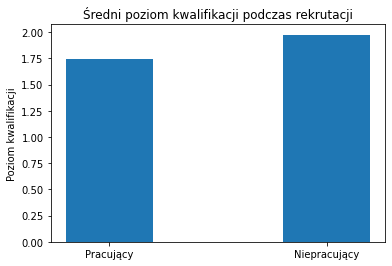

In [112]:
plt.bar(averages_df['Status'], averages_df['Avg.Joining.Designation'], width = 0.4)
plt.title("Średni poziom kwalifikacji podczas rekrutacji")
plt.ylabel("Poziom kwalifikacji")

Text(0, 0.5, 'Poziom kwalifikacji')

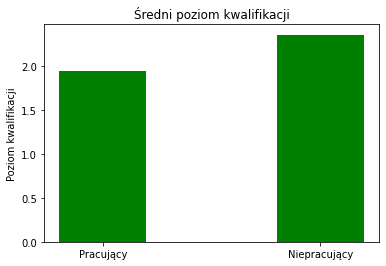

In [113]:
plt.bar(averages_df['Status'], averages_df['Avg.Designation'], width = 0.4, color = 'green')
plt.title("Średni poziom kwalifikacji")
plt.ylabel("Poziom kwalifikacji")

Text(0, 0.5, 'Wartość biznesowa KPI')

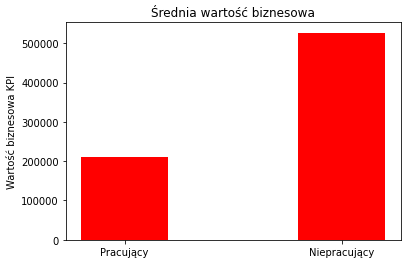

In [114]:
plt.bar(averages_df['Status'], averages_df['Avg.Total.Business.Value'], width = 0.4, color ='red')
plt.title("Średnia wartość biznesowa")
plt.ylabel("Wartość biznesowa KPI")

Text(0, 0.5, 'Zmiana wartości biznesowej KPI')

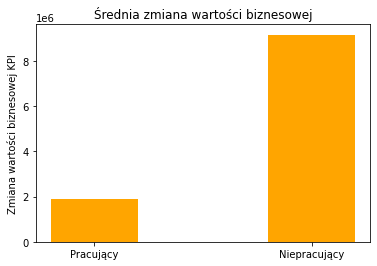

In [115]:
plt.bar(averages_df['Status'], averages_df['Avg.Business.Value.Change'], width = 0.4, color ='orange')
plt.title("Średnia zmiana wartości biznesowej")
plt.ylabel("Zmiana wartości biznesowej KPI")

Text(0, 0.5, 'Ocena kwartalna')

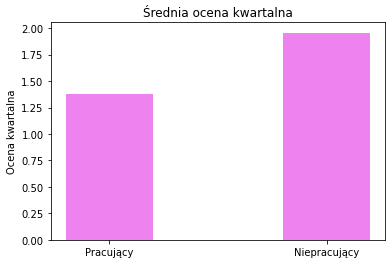

In [116]:
plt.bar(averages_df['Status'], averages_df['Avg.Quarterly.Rating'], width = 0.4, color = 'violet')
plt.title("Średnia ocena kwartalna")
plt.ylabel("Ocena kwartalna")

Text(0, 0.5, 'Pensja [USD]')

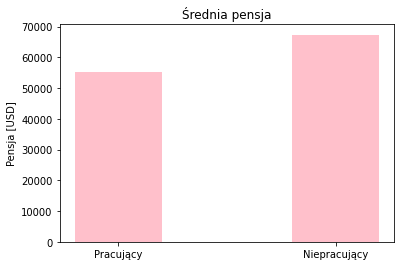

In [117]:
plt.bar(averages_df['Status'], averages_df['Avg.Salary'], width = 0.4, color = 'pink')
plt.title("Średnia pensja")
plt.ylabel("Pensja [USD]")

### Wnioski
Na podstawie wykresów można stwierdzić, że pracownicy, którzy odeszli, posiadali wyższe kwalifikacje niż pracownicy, którzy nadal pracują w firmie.
Wartość biznesowa, ocena kwartalna i poziom kwalifikacji pracowników, którzy odeszli, jest wyższy od tych wartości u pracowników nadal zatrudnionych. 
Średnia pensja pracowników, którzy odeszli, jest wyższa niż pracowników nadal zatrudnionych, jednak ta różnica jest nieproporcjonalna w porównaniu do różnicy w wartości biznesowej i ocenie kwartalnej. Pracownicy, którzy osiągają wysokie wyniki i otrzymują pensję nieproporcjonalną do ich wyników, mają największe szanse na opuszczenie firmy w najbliższym czasie.

## Analiza zawartości pliku Cities_map.csv

In [118]:
Cities_map.head(10)

,City_ID,City_Name
0,C01,Austin
1,C02,Boston
2,C03,Charlotte
3,C04,Chicago
4,C05,Columbus
5,C06,Dallas
6,C07,Denver
7,C08,Detroit
8,C09,El Paso
9,C10,Fort Worth


#### Ujednolicenie City_ID miedzy ramkami danych

In [119]:
for i in range(9):
  j = str(i+1)
  Cities_map['City_ID'][i] = str("C"+j)
Cities_map.head(10)

,City_ID,City_Name
0,C1,Austin
1,C2,Boston
2,C3,Charlotte
3,C4,Chicago
4,C5,Columbus
5,C6,Dallas
6,C7,Denver
7,C8,Detroit
8,C9,El Paso
9,C10,Fort Worth


#### Przedstawienie podstawowych informacji

In [120]:
Cities_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City_ID    29 non-null     object
 1   City_Name  29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [121]:
Cities_map.shape

(29, 2)

In [122]:
still_working['City'].describe()

count     1616
unique      29
top        C20
freq       111
Name: City, dtype: object

In [123]:
Cities_map[Cities_map['City_ID']=='C20']

,City_ID,City_Name
19,C20,Oklahoma City


In [124]:
not_working["City"].describe()

count     765
unique     29
top       C29
freq       45
Name: City, dtype: object

In [125]:
Cities_map[Cities_map['City_ID']=='C29']

,City_ID,City_Name
28,C29,Washington




*   Najwięcej pracowników pracuje w oddziale Oklahoma City. 
*   Najwięcej pracowników odeszło z oddziału Washington.
*   Z pracy w tym oddziale zrezygnowało ok 88% obecnej liczby pracowników.





In [126]:
# Liczba pracowników w danym oddziale
still_working['City'].value_counts()

C20    111
C15     69
C26     65
C10     61
C27     60
C28     59
C13     58
C14     58
C23     57
C1      56
C2      55
C17     55
C6      55
C25     54
C9      53
C8      53
C12     53
C4      52
C7      52
C3      52
C24     51
C29     51
C16     50
C22     50
C5      48
C21     48
C11     45
C18     44
C19     41
Name: City, dtype: int64

In [127]:
# Liczba osób, które już nie pracują w danym oddziale.
not_working['City'].value_counts()

C29    45
C20    41
C8     36
C16    34
C22    32
C5     32
C15    32
C19    31
C21    31
C3     30
C27    29
C26    28
C12    28
C10    25
C18    25
C4     25
C1     24
C7     24
C6     23
C28    23
C9     22
C24    22
C14    21
C25    20
C11    19
C2     17
C23    17
C17    16
C13    13
Name: City, dtype: int64

#### Procent osób niepracujących wśród wszystkich osób kiedykolwiek zatrudnionych przez firmę, oraz stosunek osób niepracujących przypadających na osoby nadal zatrudnione

In [128]:
def Fired(city):
    return not_working['City'].value_counts()[city]*100/(still_working['City'].value_counts()[city]+not_working['City'].value_counts()[city])

def St(city):
  return not_working['City'].value_counts()[city]*100/still_working['City'].value_counts()[city]

Cities_map['%fired'] = Cities_map['City_ID'].apply(Fired)
Cities_map['%not_work/work'] = Cities_map['City_ID'].apply(St)
Cities_map

,City_ID,City_Name,%fired,%not_work/work
0,C1,Austin,30.000000,42.857143
1,C2,Boston,23.611111,30.909091
2,C3,Charlotte,36.585366,57.692308
3,C4,Chicago,32.467532,48.076923
4,C5,Columbus,40.000000,66.666667
5,C6,Dallas,29.487179,41.818182
6,C7,Denver,31.578947,46.153846
7,C8,Detroit,40.449438,67.924528
8,C9,El Paso,29.333333,41.509434
9,C10,Fort Worth,29.069767,40.983607


#### Podział pracowników ze względu na płeć

In [129]:
still_working['Gender'].describe()

count     1616
unique       2
top       Male
freq       948
Name: Gender, dtype: object

In [130]:
not_working['Gender'].describe()

count      765
unique       2
top       Male
freq       456
Name: Gender, dtype: object

### Wnioski
Ilość pracowników w poszczególnych oddziałach znacząco różni się miedzy sobą.
Najwięcej pracowników pracuje w oddziale Oklahoma City. 
Natomiast najwięcej pracowników odeszło z oddziału Washington, który jest oddziałem o połowę mniej licznym niż oddział Oklahoma City.
Procent osób niepracujących wśród wszystkich osób które kiedykolwiek pracowały w danym oddziale jest zbliżony, za wyjątkiem oddziału Washington, gdzie wynosi 46,87%.
Większe różnice między poszczególnymi oddziałami można zauważyć porównując stosunek osób już niepracujących, do osób które pracują w danym oddziale. 
Tutaj również wyróżnia się oddział Washington, gdzie stosunek ten wynosi 88,23%.

Częstość zatrudniania pracowników w zależności od miesiąca

## Zmiany w firmie na przestrzeni czasu

### Wykresy z podstawowymi informacjami

Text(0.5, 0, 'Miesiąc')

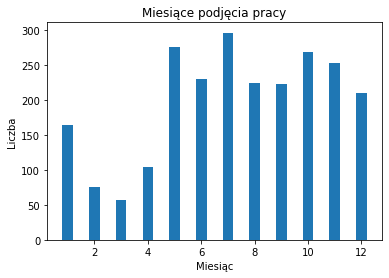

In [132]:
months_distr = [[i + 1,0] for i in range(12)]
months_space = {'October':10, 'August':8}
months_dot = {'Oct':10, 'Aug':8}
for i in worker_summary['Dateofjoining']:
    if ' ' in i:
        key = i.split(" ")[0]
        if key in months_space:
            month = months_space[key]
    elif '.' in i:
        pot_key = i.split(".")[1]
        if pot_key in months_dot:
            month = months_dot[pot_key]
        else:
            month = int(pot_key)
    months_distr[month - 1][1] += 1
months_df = pd.DataFrame(months_distr, columns = ['Month', 'Value'])
plt.bar(months_df['Month'], months_df['Value'], width = 0.4)
plt.title("Miesiące podjęcia pracy")
plt.ylabel("Liczba")
plt.xlabel("Miesiąc")

Text(0.5, 0, 'Miesiąc')

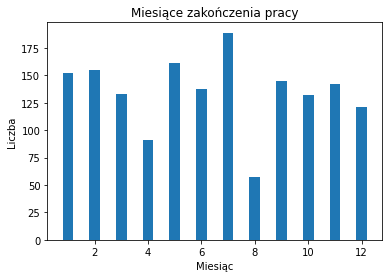

In [135]:
months2_distr = [[i + 1,0] for i in range(12)]
for i in worker_summary['LastWorkingDate']:
    if i == 0:
        continue
    if ' ' in i:
        key = i.split(" ")[0]
        if key in months_space:
            month = months_space[key]
    elif '.' in i:
        pot_key = i.split(".")[1]
        if pot_key in months_dot:
            month = months_dot[pot_key]
        else:
            month = int(pot_key)
    months2_distr[month - 1][1] += 1
months2_df = pd.DataFrame(months2_distr, columns = ['Month', 'Value'])
plt.bar(months2_df['Month'], months2_df['Value'], width = 0.4)
plt.title("Miesiące zakończenia pracy")
plt.ylabel("Liczba")
plt.xlabel("Miesiąc")

Text(0.5, 0, 'Lata pracy')

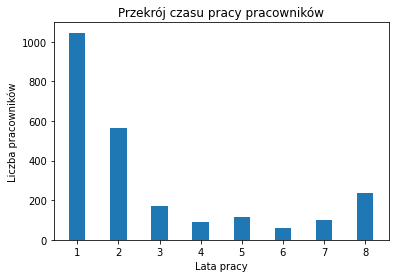

In [133]:
import datetime 
days = []
years = []
maximum = 0
for i in range(len(worker_summary)):
        first_day = worker_summary['Dateofjoining'].iloc[i]
        if ' ' in first_day:
            first_day_splited = first_day.split(" ")
            if isinstance(first_day_splited[0], str):
                first_day_splited[0] = months_space[first_day_splited[0]]
            first_datetime = datetime.datetime(int(first_day_splited[2]), first_day_splited[0], int(first_day_splited[1]))
        elif first_day.split(".")[1] in months_dot:
            first_day_splited = first_day.split(".")
            first_day_splited[1] = months_dot[first_day.split(".")[1]]
            first_day_splited[2] = "20" + first_day_splited[2]
            first_datetime = datetime.datetime(int(first_day_splited[2]), int(first_day_splited[1]), int(first_day_splited[0]))
        else:
            first_day_splited = first_day.split(".")
            first_datetime = datetime.datetime(int(first_day_splited[2]), int(first_day_splited[1]), int(first_day_splited[0]))
        if maximum == 0:
            maximum = first_datetime
        elif maximum < first_datetime:
            maximum = first_datetime
for i in range(len(worker_summary)):
        first_day = worker_summary['Dateofjoining'].iloc[i]
        last_day = worker_summary['LastWorkingDate'].iloc[i]
        if last_day == 0:
            last_day = str(maximum)
        if len(last_day) > 10:
            last_day = last_day[:10]
        if ' ' in first_day:
            first_day_splited = first_day.split(" ")
            if isinstance(first_day_splited[0], str):
                first_day_splited[0] = months_space[first_day_splited[0]]
            first_datetime = datetime.datetime(int(first_day_splited[2]), first_day_splited[0], int(first_day_splited[1]))
        else:
            first_day_splited = first_day.split(".")
            if first_day_splited[1] in months_dot:
                first_day_splited[1] = months_dot[first_day_splited[1]]
                first_day_splited[2] = "20" + first_day_splited[2]
            first_datetime = datetime.datetime(int(first_day_splited[2]), int(first_day_splited[1]), int(first_day_splited[0]))
        if '-' not in last_day:
            last_day_splited = last_day.split(".")
            last_datetime = datetime.datetime(int(last_day_splited[2]), int(last_day_splited[1]), int(last_day_splited[0]))
        working_time_pre = str(last_datetime - first_datetime)
        if working_time_pre == "0:00:00":
            working_time = int(working_time_pre.split(":")[0])
        else:
            working_time = int(working_time_pre.split(" ")[0])
        days.append(working_time)
        years.append(int(first_day_splited[2]))
final_days = [[i + 1,0] for i in range((round(max(days)/365))+1)]
first_years = [[i, 0]for i in range(min(years), max(years)+1)]
for element in days:
    final_days[round(element / 365)][1] += 1
for element in years:
    first_years[element - min(years)][1] += 1
nr_of_years = pd.DataFrame(final_days, columns=['Years', 'Number'])
plt.bar(nr_of_years['Years'], nr_of_years['Number'], width = 0.4)
plt.title("Przekrój czasu pracy pracowników")
plt.ylabel("Liczba pracowników")
plt.xlabel("Lata pracy")

Text(0.5, 0, 'Lata pracy')

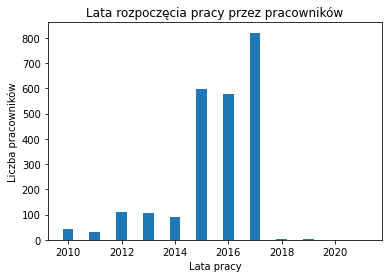

In [134]:
start_years = pd.DataFrame(first_years, columns=['Years', 'Number'])
plt.bar(start_years['Years'], start_years['Number'], width = 0.4)
plt.title("Lata rozpoczęcia pracy przez pracowników")
plt.ylabel("Liczba pracowników")
plt.xlabel("Lata pracy")

Większość pracowników rozpoczęło pracę w latach 2015 - 2017

Text(0.5, 0, 'Lata pracy')

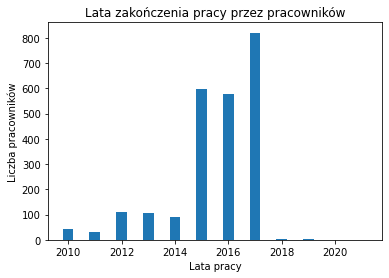

In [137]:
start_years = pd.DataFrame(first_years, columns=['Years', 'Number'])
plt.bar(start_years['Years'], start_years['Number'], width = 0.4)
plt.title("Lata zakończenia pracy przez pracowników")
plt.ylabel("Liczba pracowników")
plt.xlabel("Lata pracy")

Analogicznie, większość pracowników zakończyło pracę w latach 2015 - 2017

Text(0.5, 0, 'Miesiąc')

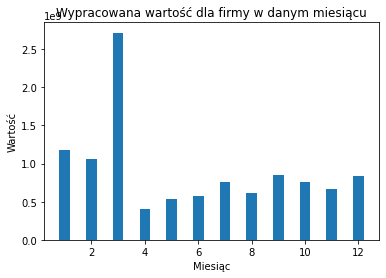

In [136]:
monthsbv_distr = [[i + 1,0] for i in range(12)]
for i in range(len(att_set)):
    date = att_set['MMM.YY'].loc[i]
    bv = att_set['Total.Business.Value'].loc[i]
    month = int(date.split(".")[1])
    monthsbv_distr[month - 1][1] += bv
monthsbv_df = pd.DataFrame(monthsbv_distr, columns = ['Month', 'Value'])
plt.bar(monthsbv_df['Month'], monthsbv_df['Value'], width = 0.4)
plt.title("Wypracowana wartość dla firmy w danym miesiącu")
plt.ylabel("Wartość")
plt.xlabel("Miesiąc")

### Wnioski
Zdecydowana większość pracowników pracuje w firmie przez 1-2 lata. Jest to niekorzystne z punktu widzenia firmy, gdyż nie pozwala na korzystanie z wypracowanego doświadczenia pracowników. Może to też oznaczać, że warunki pracy nie są dogodne dla większości z nich. 

# Podsumowanie

Na podstawie otrzymanych z analizy danych, można wywnioskować, że najczęstszą przyczyną odejścia pracowników jest dysproporcja między ich kwalifikacjami i wynikami a otrzymywaną pensją. Osoby, które odeszły z firmy wykazywały się większymi umiejętnościami podczas pracy niż osoby, które są nadal zatrudnione, bez znaczących różnic w wynagrodzeniu między tymi dwoma grupami. Przy tym warto pamiętać, że inne czynniki, takie jak oddział, w którym byli zatrudnieni pracownicy, mogły mieć wpływ na ich odejście. Oddział w Waszyngtonie, z którego odeszło 88,23% pracowników, zasługuje na szczególną uwagę.